In [2]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bl
from reservoirpy.wellproductivitypy import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gas Composition

In [3]:
composition_dict = {
    'mole_fraction':[0.7410,0.0246,0.0007,0.0005,0.0003,0.0001,0.0001,0.0005,0.0592,0.021,0.152],
    'compound':['methane','ethane','propane','isobutane','n-butane','isopentane','n-pentane','n-hexane','nitrogen','carbon-dioxide','sulfur-dioxide']
    }


composition=bl.chromatography(composition_dict)
composition

,mole_fraction,formula,mw,ppc,tpc
compound,,,,,
methane,0.7410,CH4,16.0430,666.4,-116.67
ethane,0.0246,C2H6,30.0700,706.5,89.92
propane,0.0007,C3H8,44.0970,616.0,206.06
isobutane,0.0005,C4H10,58.1230,527.9,274.46
n-butane,0.0003,C4H10,58.1230,550.6,305.62
isopentane,0.0001,C5H12,72.1500,490.4,369.10
n-pentane,0.0001,C5H12,73.1500,488.6,385.80
n-hexane,0.0005,C6H14,86.1770,436.9,453.60
nitrogen,0.0592,N2,28.0134,493.1,-232.51


## Create Gas Object

Create gas object with chromatography and PVT from Correlations

In [3]:
fm = 'formation_1'
t= 122
g = bl.gas(formation=fm, temp=t, chromatography=composition)
g.pvt_from_correlations()
g.pvt

,z,rhog,bg,mug,cg
pressure,,,,,
20.000000,0.997746,0.080511,0.146043,0.010978,0.050000
282.105263,0.969095,1.169201,0.010056,0.011298,0.003545
544.210526,0.942106,2.320127,0.005068,0.011795,0.001838
806.315789,0.916777,3.532531,0.003329,0.012443,0.001240
1068.421053,0.893109,4.804880,0.002447,0.013248,0.000936
1330.526316,0.871101,6.134785,0.001917,0.014227,0.000752
1592.631579,0.850754,7.518924,0.001564,0.015405,0.000628
1854.736842,0.832068,8.952988,0.001313,0.016812,0.000539
2116.842105,0.815042,10.431645,0.001127,0.018483,0.000472


In [4]:
g.sg

0.8661012803867403

In [5]:
td = 10000
md = np.linspace(0,td,20)
inc = np.zeros(md.shape)
thp = 800
surf_temp = 150
res_temp = 200
t_grad = ((200-150)/td)*100
q_rate = 2000

In [6]:
df,pwf = pi.gas_pressure_profile(md,inc,thp,q_rate,g,surf_temp=surf_temp,temp_grad=t_grad,di=2.259)

print(f'Bottom Pressure {pwf}')
print('Pressure Profile')
print(df)


Bottom Pressure 1079.2606771644917
Pressure Profile
                 pressure  pressure_gradient  temperature  iterations
0.000000       800.000000           0.000000   150.000000         0.0
526.315789     813.217315           0.025113   152.631579         2.0
1052.631579    826.587609           0.025404   155.263158         1.0
1578.947368    840.112943           0.025698   157.894737         1.0
2105.263158    853.795235           0.025996   160.526316         1.0
2631.578947    867.636432           0.026298   163.157895         1.0
3157.894737    881.638509           0.026604   165.789474         1.0
3684.210526    895.803470           0.026913   168.421053         1.0
4210.526316    910.133351           0.027227   171.052632         1.0
4736.842105    924.630216           0.027544   173.684211         1.0
5263.157895    939.296163           0.027865   176.315789         1.0
5789.473684    954.133325           0.028191   178.947368         1.0
6315.789474    969.143866           0.

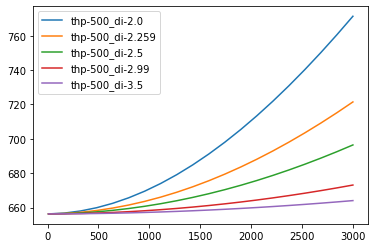

In [14]:
outflow = pi.gas_outflow_curve(md, inc, 500, g,di=[2,2.259,2.5, 2.99,3.5],surf_temp=150,temp_grad=t_grad,min_rate=10,max_rate=3000)
outflow.plot()

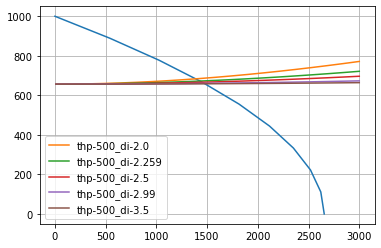

In [15]:
df,aof = pi.gas_inflow_curve(1000,3e-5,g.pvt,n=10)

fig, ax = plt.subplots()
ax.plot(df['q'],df['p'])
outflow.plot(ax=ax)
plt.grid()

In [9]:
df

,p,q
0,0.000000,2654.448144
1,111.111111,2620.634803
2,222.222222,2519.180226
3,333.333333,2350.368372
4,444.444444,2115.164805
5,555.555556,1814.685496
6,666.666667,1450.784707
7,777.777778,1025.449999
8,888.888889,540.933100
9,1000.000000,0.000000


In [10]:
q=np.zeros(df.shape[0])
q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
for i in range(df.shape[0]):
    q[i] = df.iloc[i,0]
q

array([   0.        ,  111.11111111,  222.22222222,  333.33333333,
        444.44444444,  555.55555556,  666.66666667,  777.77777778,
        888.88888889, 1000.        ])